<a href="https://colab.research.google.com/github/ronmaccms/graphML/blob/main/AR-AIA24_GraphML_Session_03_01_OSM_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GraphML Session 03


## OSM Analysis

Here we'll add weights to our graph based on nearby amenities as described in Open Street Maps.

In [ ]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 1.2 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import osmnx as ox
import pandas as pd
import numpy as np
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt

We start by gettin a location:

In [ ]:
# Set location
location = (41.3964, 2.1593)

# Download the network from location and distance param
G = ox.graph_from_point(location, dist=1000, dist_type="bbox", network_type="drive")

Next, we define what kind of "amenities" do we want to extract from OSM.

Key values to look for refer to https://wiki.openstreetmap.org/wiki/Map_Features


In [ ]:
# set value to True for all values pairable to the key
key = "amenity"
value = ["bar","restaurant","pub","cafe","fast_food"]

# Download the Points of interest
tags = {key: value}
gdf = ox.features.features_from_point(location, dist=1000, tags=tags)
gdf

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

amenity   cuisine                       name  \
element_type osmid                                                        
node         364731424  restaurant  japanese                  Hanibishi   
             570117144  restaurant       NaN                  Cal Boter   
             587998431  restaurant   catalan                 Fonda Pepa   
             588002549         bar       NaN                  La Cigale   
             588003295  restaurant   mexican             Sabes una Cosa   
...                            ...       ...                        ...   
way          249403920  restaurant   mexican  El Rincón Maya Restaurant   
             306577676         bar       NaN               Banker's Bar   
             306577677  restaurant       NaN                      Blanc   
             467485984  restaurant   spanish                El Nacional   
             989833755        cafe       NaN                  Good News   

                                               opening_hours  \
element_type osmid                                             
node         364731424      PH,Mo-Su 13:00-16:30,19:00-23:30   
             570117144                                   NaN   
             587998431                                   NaN   
             588002549                                   NaN   
             588003295                                   NaN   
...                                                      ...   
way          249403920                                   NaN   
             306577676                                   NaN   
             306577677                                   NaN   
             467485984  Su-Th 12:00-02:00; Fr-Sa 12:00-03:00   
             989833755                                   NaN   

                                                                 geometry  \
element_type osmid                                                          
node         364731424                           POINT (2.16218 41.38952)   
             570117144                           POINT (2.16234 41.40217)   
             587998431                           POINT (2.16217 41.40204)   
             588002549                           POINT (2.16194 41.40189)   
             588003295                           POINT (2.16200 41.40194)   
...                                                                   ...   
way          249403920  POLYGON ((2.15818 41.38904, 2.15818 41.38897, ...   
             306577676  POLYGON ((2.16655 41.39134, 2.16657 41.39135, ...   
             306577677  POLYGON ((2.16670 41.39129, 2.16680 41.39122, ...   
             467485984  POLYGON ((2.16806 41.39056, 2.16813 41.39062, ...   
             989833755  POLYGON ((2.15530 41.39522, 2.15534 41.39523, ...   

                        check_date     name:ca addr:housenumber  \
element_type osmid                                                
node         364731424         NaN         NaN              NaN   
             570117144  2024-02-03   Cal Boter              NaN   
             587998431  2024-02-03  Fonda Pepa               58   
             588002549         NaN         NaN              NaN   
             588003295         NaN         NaN              NaN   
...                            ...         ...              ...   
way          249403920         NaN         NaN              183   
             306577676         NaN         NaN              NaN   
             306577677         NaN         NaN              NaN   
             467485984         NaN         NaN              24B   
             989833755  2024-03-16         NaN              NaN   

                               addr:street             phone  ...  \
element_type osmid                                            ...   
node         364731424                 NaN               NaN  ...   
             570117144                 NaN               NaN  ...   
             587998431   Carrer de Tordera  +34 93 207 22 53  ...   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

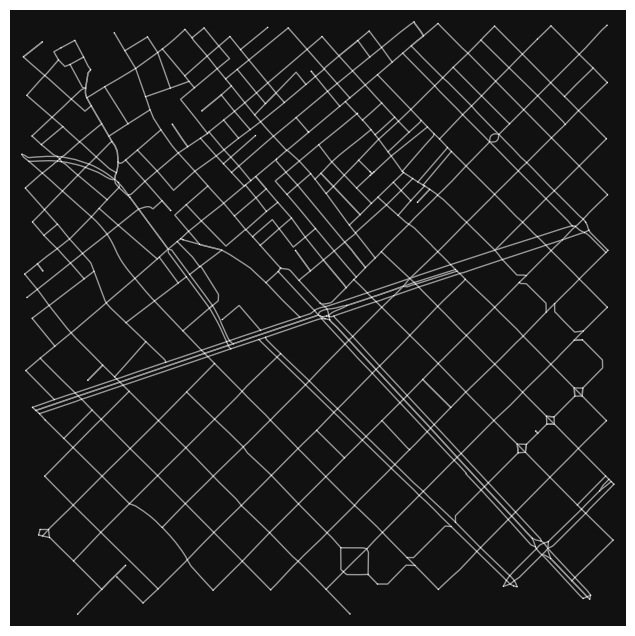

(1428, 164)

In [ ]:
ox.plot_graph(G, node_size=1)
gdf.shape

In [ ]:
# Filter out non-points geometry
gdf_pts = gdf.loc[gdf.geometry.geometry.type=='Point']
gdf_pts.shape
gdf_pts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amenity   cuisine                         name  \
element_type osmid                                                            
node         364731424    restaurant  japanese                    Hanibishi   
             570117144    restaurant       NaN                    Cal Boter   
             587998431    restaurant   catalan                   Fonda Pepa   
             588002549           bar       NaN                    La Cigale   
             588003295    restaurant   mexican               Sabes una Cosa   
...                              ...       ...                          ...   
             11802841810  restaurant     tapas                    O'Brindis   
             11817152012   fast_food     sushi                  Fast Kibuka   
             11819919935  restaurant  regional  La Botigueta del Bon Menjar   
             11853973569  restaurant       NaN                         Jobs   
             11854061692  restaurant     crepe                    Crep Nova   

                                                          opening_hours  \
element_type osmid                                                        
node         364731424                 PH,Mo-Su 13:00-16:30,19:00-23:30   
             570117144                                              NaN   
             587998431                                              NaN   
             588002549                                              NaN   
             588003295                                              NaN   
...                                                                 ...   
             11802841810                                            NaN   
             11817152012                                    13:00-22:00   
             11819919935  Mo-Fr 11:00-16:00,19:00-21:30; Sa 12:00-16:00   
             11853973569                                            NaN   
             11854061692                                            NaN   

                                          geometry  check_date     name:ca  \
element_type osmid                                                           
node         364731424    POINT (2.16218 41.38952)         NaN         NaN   
             570117144    POINT (2.16234 41.40217)  2024-02-03   Cal Boter   
             587998431    POINT (2.16217 41.40204)  2024-02-03  Fonda Pepa   
             588002549    POINT (2.16194 41.40189)         NaN         NaN   
             588003295    POINT (2.16200 41.40194)         NaN         NaN   
...                                            ...         ...         ...   
             11802841810  POINT (2.14732 41.39802)  2024-04-08         NaN   
             11817152012  POINT (2.15242 41.40256)  2024-04-14         NaN   
             11819919935  POINT (2.15277 41.40431)  2024-04-15         NaN   
             11853973569  POINT (2.15597 41.38853)         NaN         NaN   
             11854061692  POINT (2.16723 41.39721)  2024-04-27         NaN   

                         addr:housenumber            addr:street  \
element_type osmid                                                 
node         364731424                NaN                    NaN   
             570117144                NaN                    NaN   
             587998431                 58      Carrer de Tordera   
             588002549                NaN                    NaN   
             588003295                NaN                    NaN   
...                                   ...                    ...   
             11802841810              NaN                    NaN   
             11817152012              153  Carrer Gran de Gràcia   
             11819919935               18  Carrer de Santa Àgata   
             11853973569              NaN                    NaN   
             11854061692              308     Carrer de Mallorca   

                                     phone  ... self_service contact:linkedin  \
element_type osmid                          

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


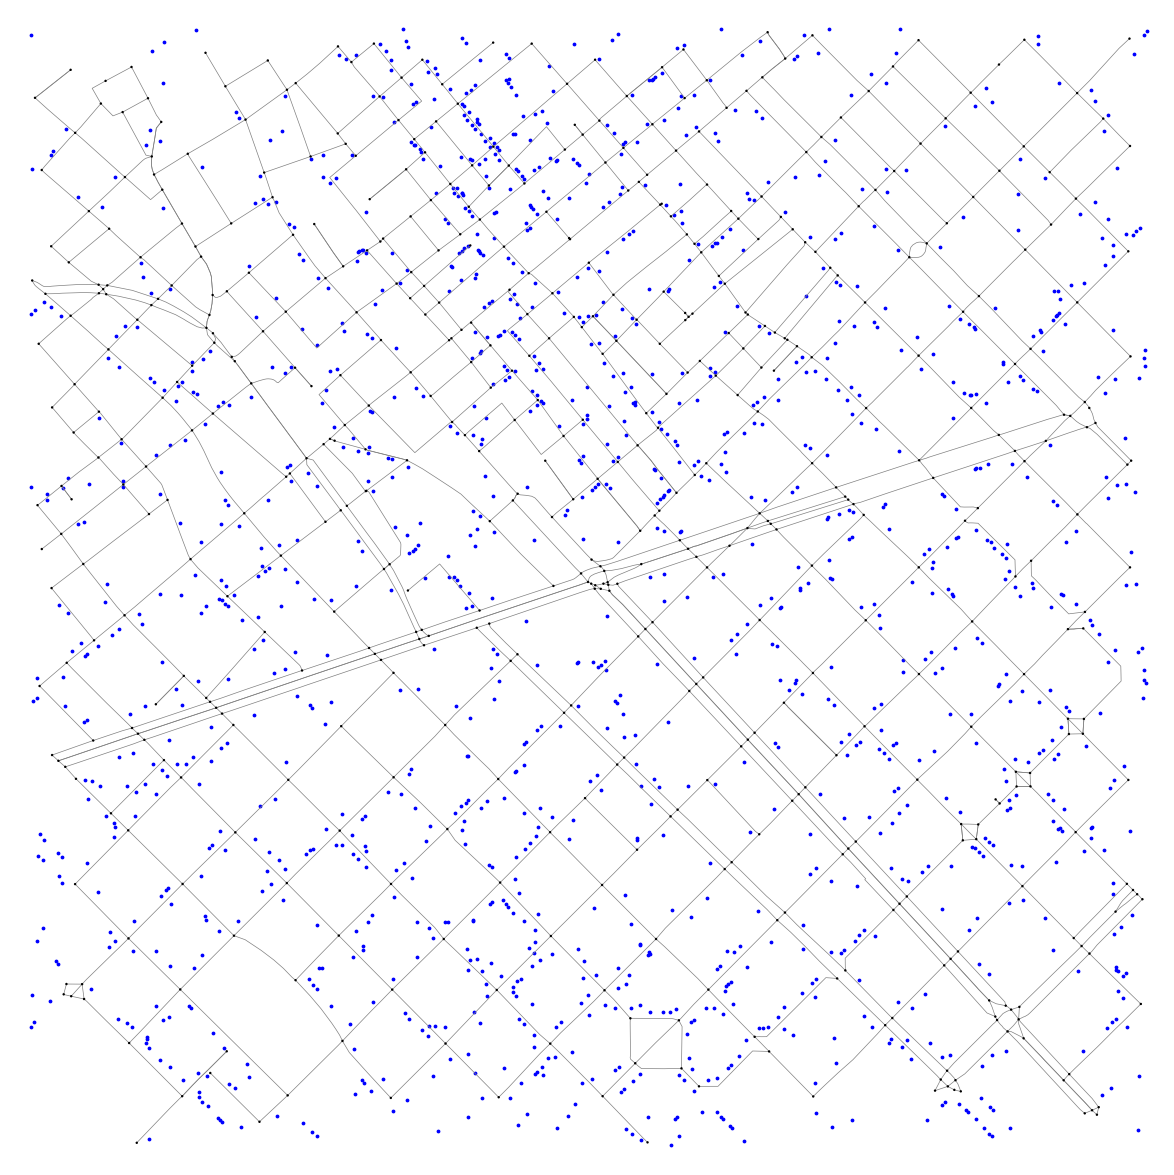

In [ ]:
# Start plotting
fig, ax = plt.subplots(figsize=(15, 15))

# Plot GeoDataFrame
gdf_pts.plot(ax=ax, color='blue', markersize=3)

# Draw the graph
ox.plot_graph(G, ax=ax, node_size=3, node_color= "black", edge_linewidth=0.5, edge_color='gray')

plt.show()

In [ ]:
# Reproject to a projected crs (meters)
crs = 3857 #mercator

G_proj = ox.projection.project_graph(G, to_crs=crs)
gdf_pts_proj = ox.projection.project_gdf(gdf_pts, to_crs=crs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the nearest edge per point
G_dist = ox.distance.nearest_edges(G_proj, X= gdf_pts_proj['geometry'].x, Y=gdf_pts_proj['geometry'].y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
G_dist

In [ ]:
# Decompose the graph
G_nodes, G_edges = ox.graph_to_gdfs(G_proj)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Count occurences in distance df
occurences = Counter(G_dist)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
occurences

In [ ]:
# Initialize empty list for values
cost = []

# Map occurences to G_edge df
for i in G_edges.index:
    occurence = occurences[G_edges.loc[i].name]
    cost.append(occurence)

# Double check that remapping worked
print( 'remapped pts:',sum(cost),'/',len(G_dist))

# Harmonize weights?
# cost = [item / max(cost) for item in cost]

# Update the graph
G_edges['repulsive'] = cost
G_edges['attractive'] = [((max(cost))-item) for item in cost]

G_cost = ox.graph_from_gdfs(G_nodes,G_edges)

remapped pts: 1422 / 1422


In [ ]:
G_edges

osmid  oneway lanes  \
u           v           key                                        
26057312    269369082   0                304693491    True     4   
            3229689808  0                545718428    True     2   
269369082   442540235   0                116343002    True     1   
            1311770050  0                116343003    True     4   
3229689808  30254225    0    [18522669, 545718430]    True     5   
...                                            ...     ...   ...   
11282472009 1377225915  0               1217655906    True   NaN   
11282472015 11282472009 0               1217655905    True   NaN   
            11276298354 0               1217655908    True     4   
11289475293 126797988   0                876196208    True   NaN   
11466476297 559765964   0                  8380873    True     1   

                                                          name        highway  \
u           v           key                                                     
26057312    269369082   0                    Passeig de Gràcia       tertiary   
            3229689808  0      Gran Via de les Corts Catalanes        primary   
269369082   442540235   0    Passeig de Gràcia (lateral Besòs)  living_street   
            1311770050  0                    Passeig de Gràcia       tertiary   
3229689808  30254225    0      Gran Via de les Corts Catalanes        primary   
...                                                        ...            ...   
11282472009 1377225915  0                    Passeig de Gràcia       tertiary   
11282472015 11282472009 0                    Passeig de Gràcia       tertiary   
            11276298354 0                Plaça del Cinc d'Oros      secondary   
11289475293 126797988   0     Plaça de Mossèn Jacint Verdaguer       tertiary   
11466476297 559765964   0                  Rambla de Catalunya    residential   

                            maxspeed width reversed   length  \
u           v           key                                    
26057312    269369082   0         50     8    False   12.051   
            3229689808  0         50    14    False   15.587   
269369082   442540235   0         10   NaN    False  130.310   
            1311770050  0         50   NaN    False   31.357   
3229689808  30254225    0         50    14    False  155.871   
...                              ...   ...      ...      ...   
11282472009 1377225915  0        NaN   NaN    False   15.770   
11282472015 11282472009 0        NaN   NaN    False   11.793   
            11276298354 0         30   NaN    False   14.941   
11289475293 126797988   0         30    15    False   13.360   
11466476297 559765964   0         30   NaN    False   22.244   

                                                                      geometry  \
u           v           key                                                      
26057312    269369082   0    LINESTRING (241381.844 5069977.495, 241371.736...   
            3229689808  0    LINESTRING (241381.844 5069977.495, 241397.173...   
269369082   442540235   0    LINESTRING (241368.953 5069986.902, 241366.950...   
            1311770050  0    LINESTRING (241368.953 5069986.902, 241346.088...   
3229689808  30254225    0    LINESTRING (241401.592 5069984.023, 241407.314...   
...                                                                        ...   
11282472009 1377225915  0    LINESTRING (240401.142 5070983.105, 240414.244...   
11282472015 11282472009 0    LINESTRING (240387.917 5070991.638, 240394.362...   
            11276298354 0    LINESTRING (240387.917 5070991.638, 240397.157...   
11289475293 126797988   0    LINESTRING (241568.661 5071415.347, 241566.267...   
11466476297 559765964   0    LINESTRING (241261.564 5069782.184, 241254.729...   

                              ref est_width access  junction  repulsive  \
u           v           key                                               
26057312    269369082   0     NaN       NaN    NaN      

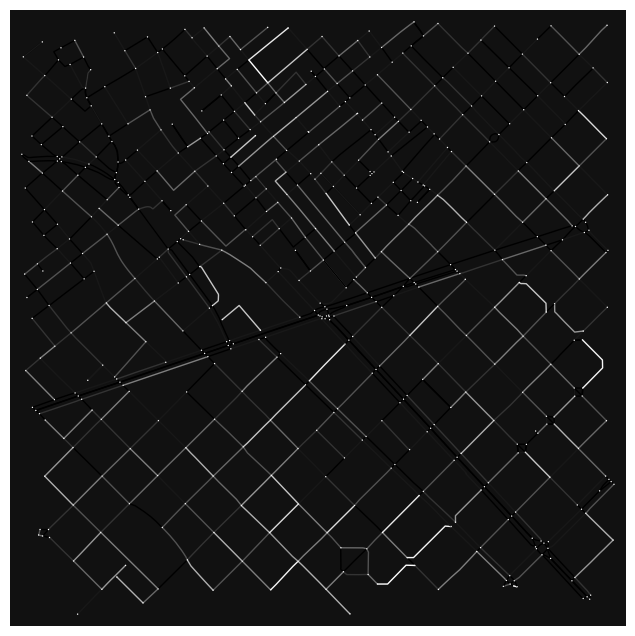

In [ ]:
# Plot graph with custom weights
ec = ox.plot.get_edge_colors_by_attr(G_cost, attr="repulsive",  cmap="Greys_r")

fig, ax = ox.plot_graph(G_cost, node_size=1, edge_color=ec, edge_linewidth=1)

In [ ]:
# Calculate Shortest path with custom weight
orig = list(G_cost)[1]
dest = list(G_cost)[300]

route_cost = ox.shortest_path(G_cost, orig, dest, weight="repulsive")
route_cost_neg = ox.shortest_path(G_cost, orig, dest, weight="attractive")

In [ ]:
# get source node(s)
source_node = [orig]
# iterate through the nodes and apply parameters
node_color = ['red' if node in source_node else 'white' for node in G.nodes()]
node_size = [100 if node in source_node else 5 for node in G.nodes()]

In [ ]:
route_cost

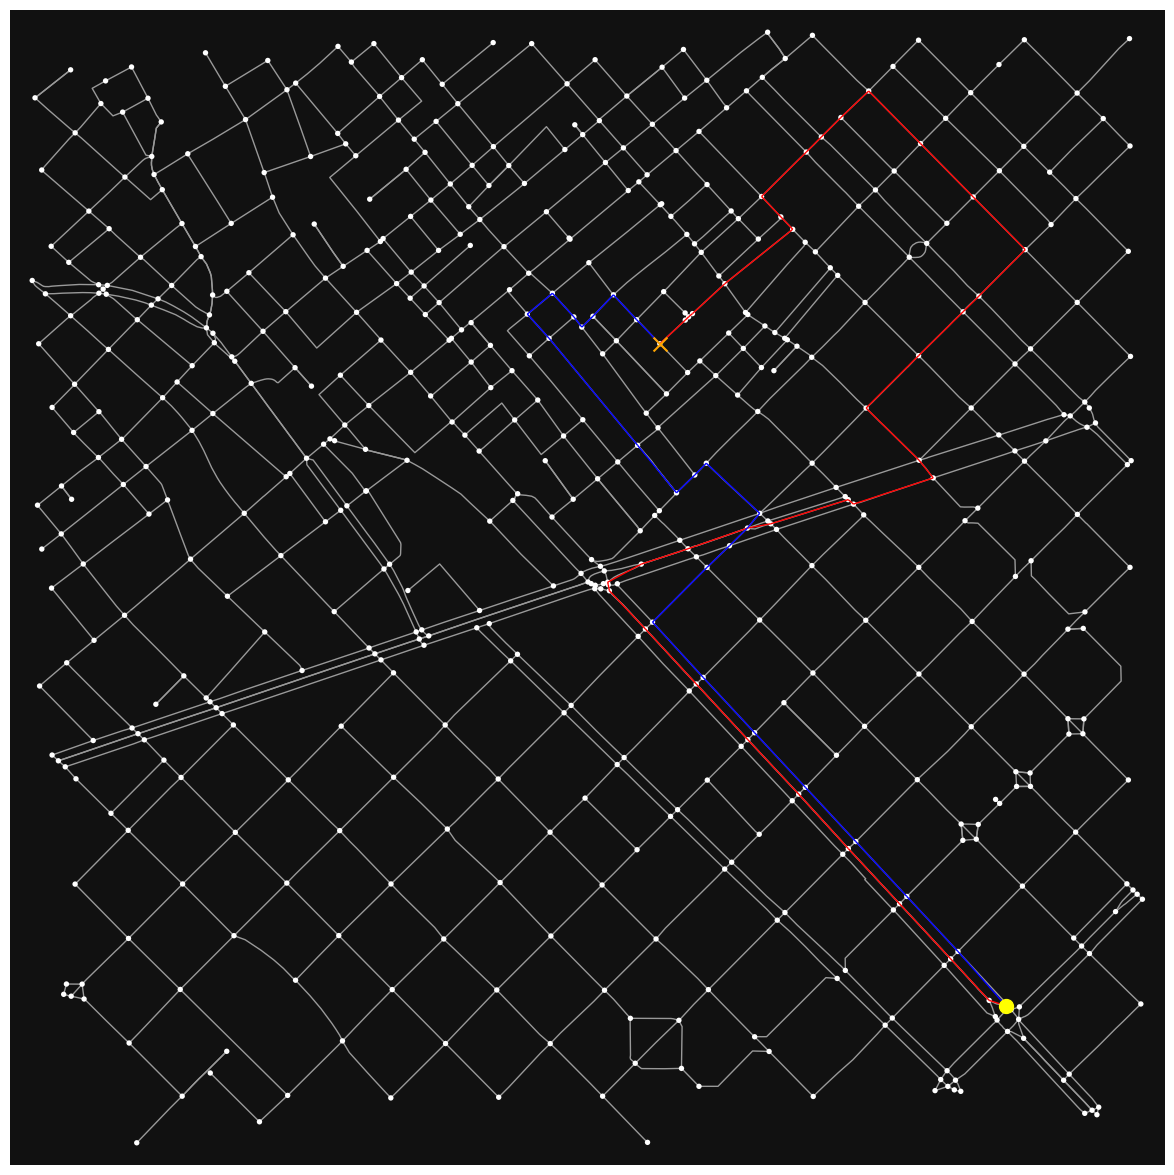

In [ ]:
# Plot the graph
fig, ax = ox.plot_graph(G,  figsize=(15, 15), show=False, close=False)

# Get node positions, stored in node attribute 'pos'
pos = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

# Highlight route_cost in red
path_edges_A = list(zip(route_cost[:-1], route_cost[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges_A, edge_color='red', width=1, ax=ax, arrows=False)

# Highlight route_cost_neg in blue
path_edges_B = list(zip(route_cost_neg[:-1], route_cost_neg[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges_B, edge_color='blue', width=1, ax=ax, arrows=False)

# Highlight the source nodes for both paths
source_nodes = {route_cost[0], route_cost_neg[0]}
nx.draw_networkx_nodes(G, pos, nodelist=list(source_nodes), node_color='yellow', node_size=100, ax=ax)

# Highlight the target nodes for both paths with 'X' marker
target_nodes = {route_cost[-1], route_cost_neg[-1]}
nx.draw_networkx_nodes(G, pos, nodelist=list(target_nodes), node_color='orange', node_size=100, node_shape='x', ax=ax)


# Show the plot
plt.show()